# Python 测试

In [1]:
%pip install matplotlib seaborn pandas

Looking in indexes: https://pypi.douban.com/simple
     |████████████████████████████████| 7.3 MB 1.2 MB/s            
     |████████████████████████████████| 285 kB 1.1 MB/s            
     |████████████████████████████████| 65 kB 538 kB/s            
     |████████████████████████████████| 241 kB 840 kB/s            
     |████████████████████████████████| 959 kB 1.1 MB/s            
     |████████████████████████████████| 3.1 MB 1.2 MB/s            
You should consider upgrading via the '/Users/zhangchunyang/.pyenv/versions/3.8.2/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.xkcd()
sns.set_context('poster')

Fontconfig warning: ignoring UTF-8: not a valid region tag


## 数据

In [14]:
versions = ['3.5', '3.6', '3.7', '3.8', '3.9', '3.10', '3.11']
times = [63.3502,  62.9635, 57.5806, 59.0129, 54.4991, 47.7407, 31.9501]

c_data = [8.92218, 9.01176]

df = pd.DataFrame({'Version': versions, 'Runtime': times})

## 只有 Python 的数据

In [4]:
import matplotlib 
print(matplotlib.get_cachedir())

/Users/zhangchunyang/.matplotlib


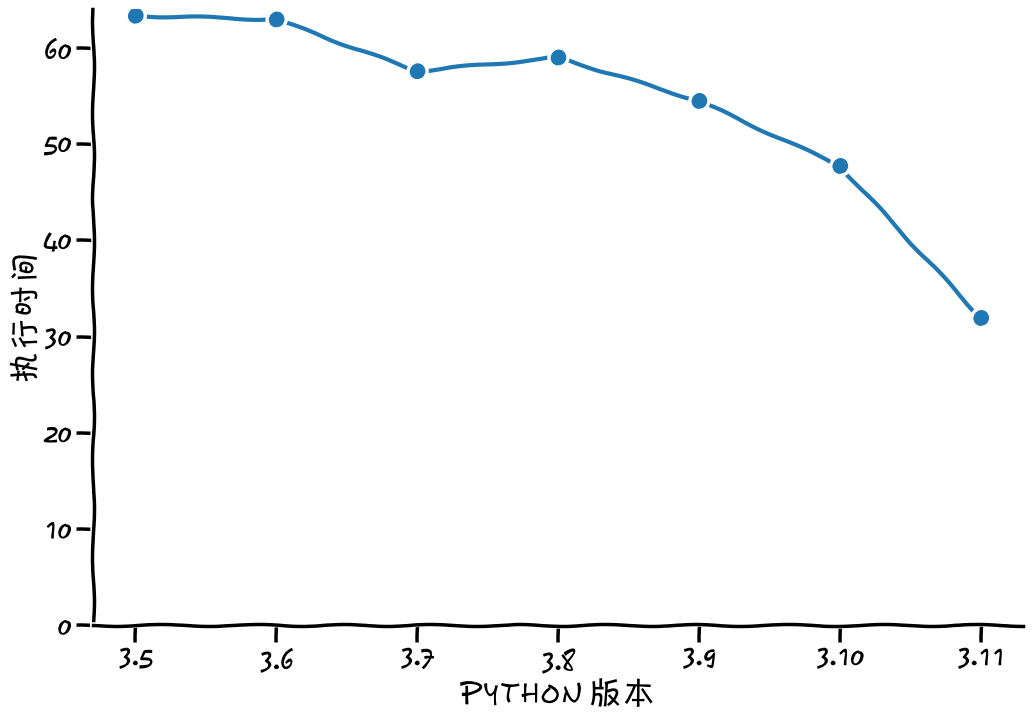

In [3]:
plt.rcParams.update({'font.family': "FZKaTong-M19S"})
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=df, x='Python 版本', y='执行时间', marker="o", ax=ax)
sns.despine()
_ = ax.set_ylim([0,64])

fig.savefig('../assets/1_only_python.png', bbox_inches='tight')

## 包含 C++ 的版本

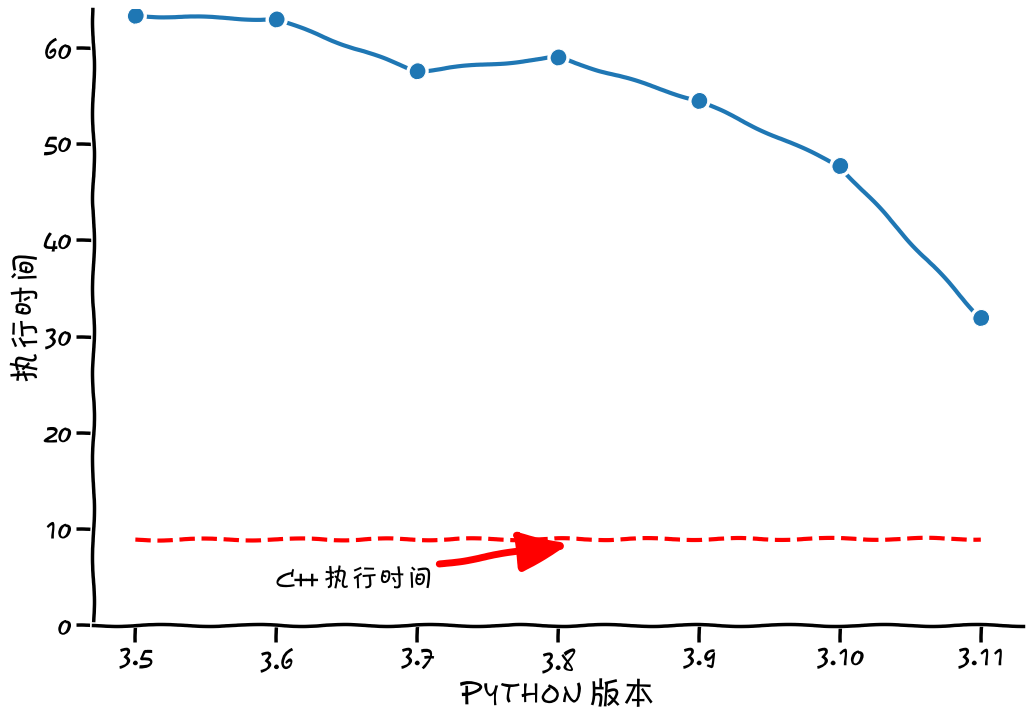

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=df, x='Python 版本', y='执行时间', marker="o", ax=ax)
sns.despine()
_ = ax.set_ylim([0,64])
_ = ax.plot(['3.5', '3.11'], c_data, 'r--')


ax.annotate(
    "C++ 执行时间", 
    xy=(3.1, 8.5), 
    xytext=(1, 4), 
    arrowprops={
        "arrowstyle":"-|>, head_length=1.5, head_width=0.6", 
        "color":"red",
        "lw":5,
    },
    fontsize=20,
)

fig.savefig('../assets/2_include_cpp.png', bbox_inches='tight')

## 预测

In [16]:
df

,Version,Runtime,major_version
0,3.5,63.3502,3
1,3.6,62.9635,3
2,3.7,57.5806,3
3,3.8,59.0129,3
4,3.9,54.4991,3
5,3.10,47.7407,3
6,3.11,31.9501,3


In [17]:
df['major_version'] = df['Version'].str.split('.').str[0].astype(int)
df['minor_version'] = df['Version'].str.split('.').str[1].astype(int)
df

,Version,Runtime,major_version,minor_version
0,3.5,63.3502,3,5
1,3.6,62.9635,3,6
2,3.7,57.5806,3,7
3,3.8,59.0129,3,8
4,3.9,54.4991,3,9
5,3.10,47.7407,3,10
6,3.11,31.9501,3,11


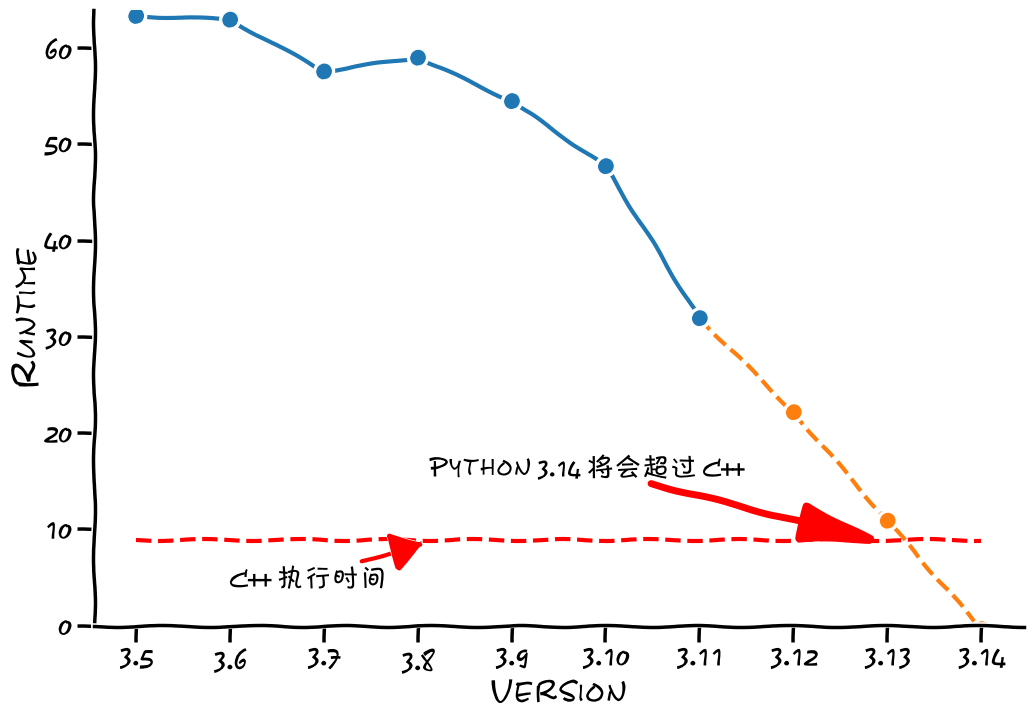

In [46]:
cpp_time = c_data[0]

prev_n = 3
x = df.loc[len(df)-prev_n:, 'minor_version']
y = df.loc[len(df)-prev_n:, 'Runtime']

parameters = np.polyfit(x, y, 1)

def polyfit(parameters: list, x: int) -> float:
    return x * parameters[0] + parameters[1]

last_version = df.minor_version.iat[-1]
ith_version = last_version + 1
new_versions, new_times = [], []
while True:
    new_versions.append(ith_version)
    new_times.append(polyfit(parameters, ith_version))
    ith_version += 1
    if new_times[-1] < cpp_time:
        break

new_labels = [str(df.major_version.iat[0]) + '.' + str(x) for x in new_versions]

new_version_df = pd.DataFrame({
    'Version': new_labels,
    'Runtime': new_times,
})

colors = sns.color_palette("tab10")
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=df, x='Version', y='Runtime', marker="o", ax=ax, color=colors[0], zorder=2)
sns.despine()
ax.set_ylim([0,64])
# ax.set_xlim([3.7, 3.11])

sns.lineplot(data=new_version_df, x='Version', y='Runtime', marker="o", ax=ax, color=colors[1], linestyle='--', zorder=2)
_ = ax.plot([df['Version'].iat[-1], new_labels[0]], [df['Runtime'].iat[-1], new_times[0]], '--', color=colors[1], zorder=1)

# C++ version
_ = ax.plot(['3.5', new_labels[-1]], [8.9, 8.9], 'r--')

_ = ax.annotate(
    "C++ 执行时间", 
    xy=(3.1, 8.7), 
    xytext=(1, 4), 
    arrowprops={
        "arrowstyle":"-|>, head_length=1, head_width=0.6", 
        "color":"red",
        "lw":3,
    },
    fontsize=20,
)

_ = ax.annotate(
    "Python 3.14 将会超过 C++", 
    xy=(8, 8.5), 
    xytext=(3.13, 15.5), 
    arrowprops={
        "arrowstyle":"-|>, head_length=2.5, head_width=0.6", 
        "color":"red",
        "lw":5,
    },
    fontsize=20,
)

fig.savefig('../assets/3_extrapolated.png', bbox_inches='tight')

In [62]:
new_version_df

,Python version,Loop time
0,3.12,4.260433
1,3.13,2.013833
2,3.14,-0.232767
